# Week 03: Logistic Regression

## Introduction

In this exercise, the logistic regression will be implemented and applied to a given dataset.

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt

# Library for Scientific computing (Optimization, linear algebra, integration, FFT, ODE solvers etc.)
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Logistic Regression as Linear Classifier

In this part of the exercise, we will build a logistic regression model to predict **whether a student gets admitted into a university.**

Suppose that the administrator of a university department want to determine each applicant’s chance of admission based on their results on two exams.

The historical data from previous applicants can be used as a training set for logistic regression. For each training example, the **applicant’s scores on two exams** and the **admissions decision** is available.

The task is to **build a classification model** that estimates an **applicant’s probability of admission** based the scores from those two exams.

![](Figures/data.png)

In the following cell, we will load the data and corresponding labels:

In [5]:
# Load data
# The first two columns contains the exam scores (out of 100) and
# the third column contains the labels ('1' for 'Admitted' & '0' for 'Not admitted').
data = np.loadtxt(('linearClass.txt'),delimiter=',')
X, y = data[:,0:2], data[:,2]


In [6]:
X.shape

(100, 2)

### Visualizing the data

The data will be displayed on a 2-dimensional plot by calling the function `plotData` which displays a figure where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

![](Figures/dataplot1.png)

In [9]:
def plotData(X,y):
    # Create new figure
    
    # =======================
    pos = y==1
    neg = y==0
    
    plt.plot(X[pos,0],X[pos,1],'ko')
    plt.plot(X[neg,0],X[neg,1],'r*')
    
    # =======================

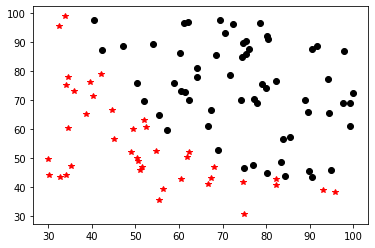

In [10]:
plotData(X,y)

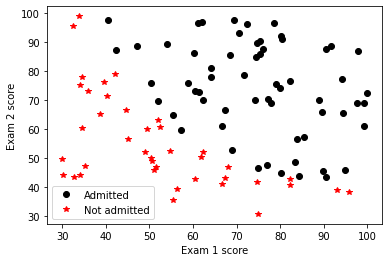

In [12]:
plotData(X, y)
# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

<a id="section1"></a>
### Implementation

#### Sigmoid function

Before you start with the actual cost function, recalling the logistic regression hypothesis which is defined as:

$$ h_w(x) = g(w^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

The first step is to implement this function `sigmoid` so it can be called by the rest of the program.

One can also try testing a few values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give exactly 0.5.
<a id="sigmoid"></a>

In [15]:
def sigmoid(z):
    
    z = np.array(z)
    
    g = np.zeros(z.shape)
    
    g = 1/(1 + np.exp(-z))

    return g

The following cell evaluates the sigmoid function at `z=0`. One should get a value of 0.5. One can also try different values for `z` to experiment with the sigmoid function.

In [16]:
# Test the implementation of sigmoid function for z = 0
z1 = 0
g = sigmoid(z1)

print('g(', z1, ') = ', g)

g( 0 ) =  0.5


#### Cost function and gradient

Now the cost function and gradient for logistic regression will be implemented by defining a function. Before proceeding, add the intercept term to X. 

In [18]:
# Setup the data matrix appropriately, and add ones for the intercept/bias term in X
m, n = X.shape

X = np.concatenate([np.ones((m,1)), X], axis = 1)


Now, define the `costFunction` which shall return the cost and gradient. The cost function in logistic regression is

$$ J(w) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_w\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_w\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost function is a vector of the same length as $w$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \left( h_w \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_w(x)$.
<a id="costFunction"></a>

In [ ]:
def costFunction(w, X, y):
    
    
    
    return J, grad

Once done with the function definition, call `costFunction` using two test cases for  `w` by executing the next cell.

In [ ]:
# Initialize fitting parameters
initial_w = np.zeros(n+1)

cost, grad = 

print('Cost at initial w (zeros): {:.3f}'.format(cost))

print('Gradient at initial w (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

#### Minimizing the cost function

In the next cell, you shall minimize the cost function for learning the optimum value of parameters in `w`.

Instead of using gradient descent method for optimization, we can directly use `scipy.optimize` module. `SciPy` is a numerical computing library for `python` which provides an optimization module for root finding and minimization.

`optimize.minimize` needs following inputs:
- `costFunction`: Name of the cost function defined earlier that takes training set and a particular `w`, computes the logistic regression cost and gradient with respect to `w` for the dataset (X, y).
- `initial_w`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments passed to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use (CG, GradDescent, BFGS)
- `options`: Additional options (such as maximum iterations) specific to the specific optimization method.


In [ ]:
# set options for optimize.minimize

options = {'maxiter' : 500}

res = optimize.minimize(costFunction,
                       initial_w,
                       (X, y),
                       jac = True,
                       method = 'CG',
                       options = options)

cost = res.fun # The 'res' contains optimization results i.e. the optimized parameters and associated minimum cost

w_opti = res.x

print('Cost at w found by optimize.minimize: {:.3f}'.format(cost))

print('Optimized w:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*w_opti))

### Plot the decision boundary

Once `optimize.minimize` completes, one can use the final value for $w$ to visualize the decision boundary on the training data.

To do so, another function `plotDecisionBoundary` can be written for plotting the decision boundary on top of training data.

![](Figures/decision_boundary1.png)

In [ ]:
w_opti = np.array(w_opti)

# Plot Data (remember first column in X is the intercept)
plotData(X[:, 1:3], y)

# Only need 2 points to define a line, so choose two endpoints
plot_x = np.array([np.min(X[:,1]) + 2, np.max(X[:,1]) - 2])

# Calculate the decision boundary line:
# From hypothesis eqn. z = w*X + w0.
# Considering the decision boundary at probability of 0.5 (i.e. z = sigmoid(0.5) = 0)
# => 0 = w*X + w0
# => w[2]*X2 = - (w[1]*X1 + w[0])
# => X2 = ?

plot_y = 

pyplot.plot(plot_x, plot_y)

pyplot.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
pyplot.xlim([30, 100])
pyplot.ylim([30, 100])

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

After learning the parameters, one can use the model to predict whether a particular student will be admitted or not. For instance, for a student with an Exam 1 score of 45 and an Exam 2 score of 85, what is the probability that the student will get admitted?

In this part, the task is to write the code in function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $w$.

In [ ]:
def predict(w_opti, X):
    
    z = np.dot(w_opti,X)
    p1  = sigmoid(z)
    p = np.round(p1)
    
    return p

Finally the training accuracy of the classifier can be computed as the percentage of examples it got correct.

In [ ]:
#  Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
pp = predict(w_opti, [1 45 85])

# Compute accuracy on our training set
p = predict(w_opti,X)

acc = np.mean(p == y)*100